In [2]:
import pandas as pd
import sqlite3
from sqlite3 import connect
from sqlalchemy import create_engine
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

In [37]:
con = sqlite3.connect('/Users/sean/labs/Capstone/TwitterStockAnalysis/sentiment.db')
# need select word cloud from the day before
df = pd.read_sql_query("SELECT * FROM nlp_analysis", con)

In [38]:
df.head()

,index,screen_name,date_time_est,text,retweeted,lang,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,0,Zed18978371,2021-09-04 08:48:31.000000,yup im crazy cryptotesla guy,0.0,en,-0.600000,0.900000,negative,0.375,0.625,0.000,-0.3400
1,1,TeslaOwls,2021-09-04 09:28:16.000000,dont believe ever claimed tesla great build qu...,0.0,en,0.427273,0.680909,positive,0.175,0.585,0.240,0.2960
2,2,vin_wiesel,2021-09-04 09:28:11.000000,media tesla crashes building autopilot,0.0,en,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,3,Jeeeeee66023780,2021-09-04 09:28:09.000000,many followers,0.0,en,0.500000,0.500000,neutral,0.000,1.000,0.000,0.0000
4,4,developrwannab,2021-09-04 09:28:53.000000,great thanks got add tesla bot thats kind deve...,0.0,en,0.525000,0.712500,positive,0.000,0.423,0.577,0.9468


## Create a word cloud per day

In [25]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

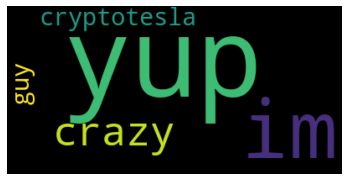

In [17]:
text = df.text[0]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud Saved Successfully


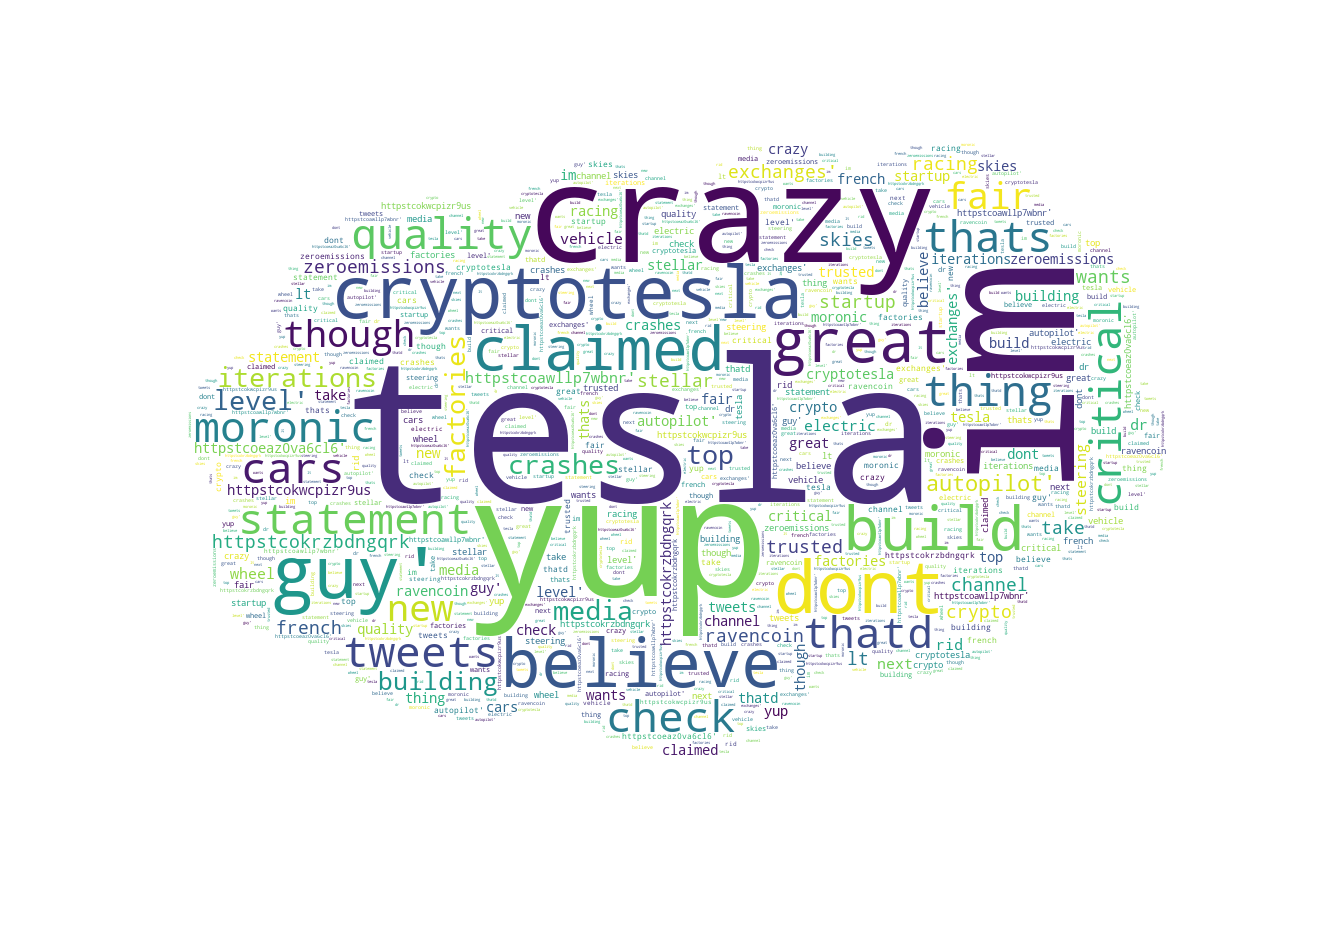

In [26]:
create_wordcloud(df["text"].values)

## Create a Sentiment Polarity per Day

In [39]:
fig = px.histogram(df, x = 'polarity')

'''df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')'''

"df['polarity'].iplot(\n    kind='hist',\n    bins=50,\n    xTitle='polarity',\n    linecolor='black',\n    yTitle='count',\n    title='Sentiment Polarity Distribution')"

In [40]:
fig.show()

In [57]:
dfstock = pd.read_csv('stock_graph.csv')
dftweets= pd.read_csv('data_graph.csv')

In [58]:
dfstock

,Unnamed: 0,last,new_date,time
0,0,734.780000,2021-09-03,09:00
1,1,731.610000,2021-09-03,09:30
2,2,731.930000,2021-09-03,10:00
3,3,730.000000,2021-09-03,10:30
4,4,730.180000,2021-09-03,11:00
5,5,727.650000,2021-09-03,11:30
6,6,728.110000,2021-09-03,12:30
7,7,730.090000,2021-09-03,13:00
8,8,728.640000,2021-09-03,13:30
9,9,726.440000,2021-09-03,14:00


In [22]:
len(dftweets)

17740

In [23]:
dftweets_2 = dftweets[dftweets['new_date'].str.match('2021-09-05')]

In [24]:
len(dftweets_2)

10863

In [25]:
dftweets_2 = dftweets_2.sort_values(by = ['time'])

In [26]:
dftweets_2

,Unnamed: 0,screen_name,text,retweeted,lang,polarity,subjectivity,sentiment,neg,neu,pos,compound,time,new_date
17603,17603,teslaloosa,love,NaN,en,0.500000,0.600000,positive,0.000,0.000,1.000,0.6369,00:00:09,2021-09-05
17602,17602,Munchie291,dogecoin accepted tesla,NaN,en,0.000000,0.000000,positive,0.000,0.488,0.512,0.2732,00:00:12,2021-09-05
17601,17601,notAbot123450,much money credibility willing lose tesla,NaN,en,0.225000,0.475000,negative,0.351,0.649,0.000,-0.4019,00:00:23,2021-09-05
17600,17600,effle,ironically ive taken supporters former guymaga...,NaN,en,-0.012500,0.600000,positive,0.248,0.451,0.301,0.3400,00:00:28,2021-09-05
17599,17599,JimWhit35636016,make wise decision moving head office texas ht...,NaN,en,0.700000,0.900000,positive,0.000,0.693,0.307,0.4767,00:00:30,2021-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7195,transportevolve,call companies criticize praise needed stop as...,NaN,en,0.275000,0.425000,positive,0.217,0.362,0.421,0.6705,23:59:21,2021-09-05
7194,7194,angadn,would love see article titled 101 times nikola...,NaN,en,-0.200000,0.766667,positive,0.182,0.592,0.226,0.2075,23:59:32,2021-09-05
7193,7193,saleemafaq,still test drive least sit car better dissatis...,NaN,en,0.128125,0.475000,positive,0.080,0.674,0.246,0.6621,23:59:52,2021-09-05
7192,7192,ByeonChansoo,tesla solar roofs last longer house elon musk ...,NaN,en,0.000000,0.066667,neutral,0.000,1.000,0.000,0.0000,23:59:54,2021-09-05


In [27]:
dftweets_2 = dftweets_2.reset_index(drop=True)
dftweets_2


,Unnamed: 0,screen_name,text,retweeted,lang,polarity,subjectivity,sentiment,neg,neu,pos,compound,time,new_date
0,17603,teslaloosa,love,NaN,en,0.500000,0.600000,positive,0.000,0.000,1.000,0.6369,00:00:09,2021-09-05
1,17602,Munchie291,dogecoin accepted tesla,NaN,en,0.000000,0.000000,positive,0.000,0.488,0.512,0.2732,00:00:12,2021-09-05
2,17601,notAbot123450,much money credibility willing lose tesla,NaN,en,0.225000,0.475000,negative,0.351,0.649,0.000,-0.4019,00:00:23,2021-09-05
3,17600,effle,ironically ive taken supporters former guymaga...,NaN,en,-0.012500,0.600000,positive,0.248,0.451,0.301,0.3400,00:00:28,2021-09-05
4,17599,JimWhit35636016,make wise decision moving head office texas ht...,NaN,en,0.700000,0.900000,positive,0.000,0.693,0.307,0.4767,00:00:30,2021-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,7195,transportevolve,call companies criticize praise needed stop as...,NaN,en,0.275000,0.425000,positive,0.217,0.362,0.421,0.6705,23:59:21,2021-09-05
10859,7194,angadn,would love see article titled 101 times nikola...,NaN,en,-0.200000,0.766667,positive,0.182,0.592,0.226,0.2075,23:59:32,2021-09-05
10860,7193,saleemafaq,still test drive least sit car better dissatis...,NaN,en,0.128125,0.475000,positive,0.080,0.674,0.246,0.6621,23:59:52,2021-09-05
10861,7192,ByeonChansoo,tesla solar roofs last longer house elon musk ...,NaN,en,0.000000,0.066667,neutral,0.000,1.000,0.000,0.0000,23:59:54,2021-09-05


In [59]:
dfstock[['avg_polarity',"num_of_tweets"]]=0
dfstock

,Unnamed: 0,last,new_date,time,avg_polarity,num_of_tweets
0,0,734.780000,2021-09-03,09:00,0,0
1,1,731.610000,2021-09-03,09:30,0,0
2,2,731.930000,2021-09-03,10:00,0,0
3,3,730.000000,2021-09-03,10:30,0,0
4,4,730.180000,2021-09-03,11:00,0,0
5,5,727.650000,2021-09-03,11:30,0,0
6,6,728.110000,2021-09-03,12:30,0,0
7,7,730.090000,2021-09-03,13:00,0,0
8,8,728.640000,2021-09-03,13:30,0,0
9,9,726.440000,2021-09-03,14:00,0,0


In [50]:
dftweets_2.time.searchsorted('16:00%', side = 'right')

7002

In [38]:
dftweets_2.compound[:2806].mean()

0.15282897362794012

In [60]:
for index, row in dfstock['time'].iteritems():
    if index == 0:
        num_tweets = dftweets_2.time.searchsorted(str(row)+'%', side = 'right')
        avg = dftweets_2.polarity[:num_tweets].mean()
        dfstock.loc[index, 'avg_polarity'] = avg
        dfstock.loc[index, 'num_of_tweets'] = num_tweets
        last_index = index
    else:
        new_num_tweets = dftweets_2.time.searchsorted(str(row)+'%', side = 'right')
        avg = dftweets_2.polarity[num_tweets:new_num_tweets].mean()
        dfstock.loc[index, 'avg_polarity'] = avg
        dfstock.loc[index, 'num_of_tweets'] = new_num_tweets-num_tweets
        num_tweets = new_num_tweets
dfstock

,Unnamed: 0,last,new_date,time,avg_polarity,num_of_tweets
0,0,734.780000,2021-09-03,09:00,0.089047,2806
1,1,731.610000,2021-09-03,09:30,0.076509,210
2,2,731.930000,2021-09-03,10:00,0.092597,254
3,3,730.000000,2021-09-03,10:30,0.081791,258
4,4,730.180000,2021-09-03,11:00,0.078434,274
5,5,727.650000,2021-09-03,11:30,0.042046,266
6,6,728.110000,2021-09-03,12:30,0.092458,634
7,7,730.090000,2021-09-03,13:00,0.085381,329
8,8,728.640000,2021-09-03,13:30,0.129527,299
9,9,726.440000,2021-09-03,14:00,0.099136,273


In [61]:
fig = px.line(dfstock, x = 'time', y = 'avg_polarity', title = 'avg polarity on 2021-09-03', 
             labels = {
                 'time': 'Time of Day (half hour)',
                 'avg_polarity': 'polarity',
             })
fig.show()

In [66]:
dfstock['time'] = str(dfstock['time'])

In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [63]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

In [68]:
fig.add_trace(
    go.Scatter(x=dfstock['time'], y=dfstock['last'], name="yaxis data"),
    secondary_y=False,
)